# Exercise 8 Part 3 

### mnist data handling
### Visualization (2D) Using PCs and t-SNE (mnist test data)

## 1. Load Data

In [37]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mnist_test_nolabels.csv', header=0)

# Display the shape of the dataframe
print(f'DataFrame shape: {df.shape}')

# Display the first 5 rows
df.head()

DataFrame shape: (10000, 784)


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Perform PCA

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

X_Scaled = StandardScaler().fit_transform(df.values)
# Initialize PCA
pca = PCA(n_components=0.95) # Retain 95% of the variance

# Fit and transform the data
df_pca = pca.fit_transform(X_Scaled)

# Number of components chosen by PCA
print(f'Number of components chosen: {pca.n_components_}')

Number of components chosen: 280


## 3. Explained Variance Plot

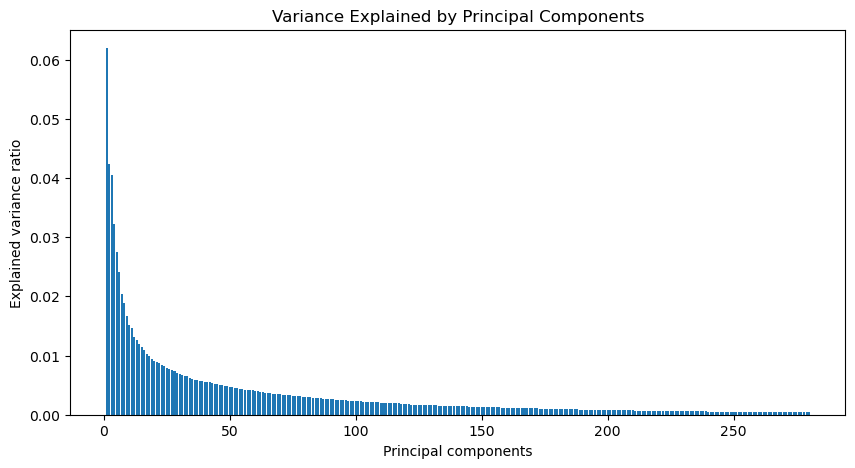

In [39]:
import matplotlib.pyplot as plt

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Explained by Principal Components')
plt.show()

## 4. Cumulative Explained Variance Plot

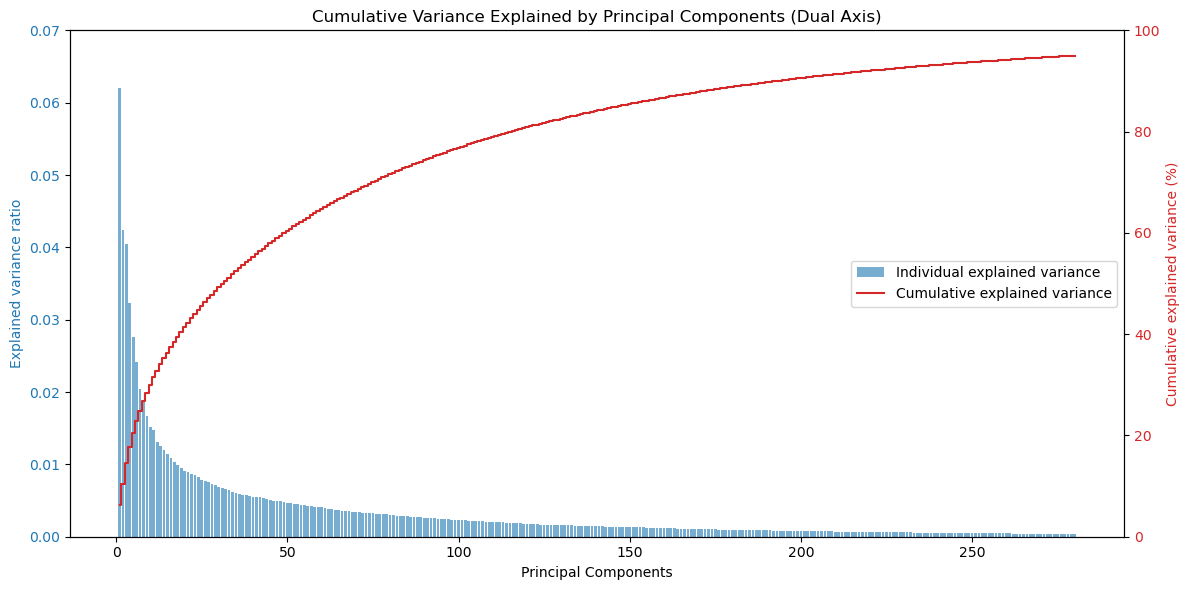

In [40]:
cumulative_variance = np.cumsum(explained_variance)

# Initialize the plot and the primary axis (Left)
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- LEFT AXIS: Individual Explained Variance ---
# Note: We do NOT multiply by 100 here, to match your requested 0.0-0.07 scale
color = 'tab:blue'
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained variance ratio', color=color)
bar_plot = ax1.bar(range(1, len(explained_variance) + 1), explained_variance, 
                   alpha=0.6, color=color, label='Individual explained variance')
ax1.tick_params(axis='y', labelcolor=color)

# Set specific scale and ticks for Left Y-Axis
ax1.set_ylim(0, 0.07)
ax1.set_yticks(np.arange(0, 0.08, 0.01)) # Ticks from 0.00 to 0.07

# --- RIGHT AXIS: Cumulative Variance ---
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Cumulative explained variance (%)', color=color)  
step_plot = ax2.step(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 
                     where='mid', color=color, label='Cumulative explained variance')
ax2.tick_params(axis='y', labelcolor=color)

# Set scale for Right Y-Axis
ax2.set_ylim(0, 100)

# --- COMBINED LEGEND ---
# Because we have two axes, we need to gather handles/labels from both
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.title('Cumulative Variance Explained by Principal Components (Dual Axis)')
plt.grid(axis='x', alpha=0.3) # Optional: adds vertical grid lines for readability
plt.tight_layout()
plt.show()

### To cover 80 % variance it needs more than 100 PCs. While PC reduced the features significantly, but still it couldn't being it considerably down to represent the data in just a few PCs.

## 5. Scatter Plot of Principal Components

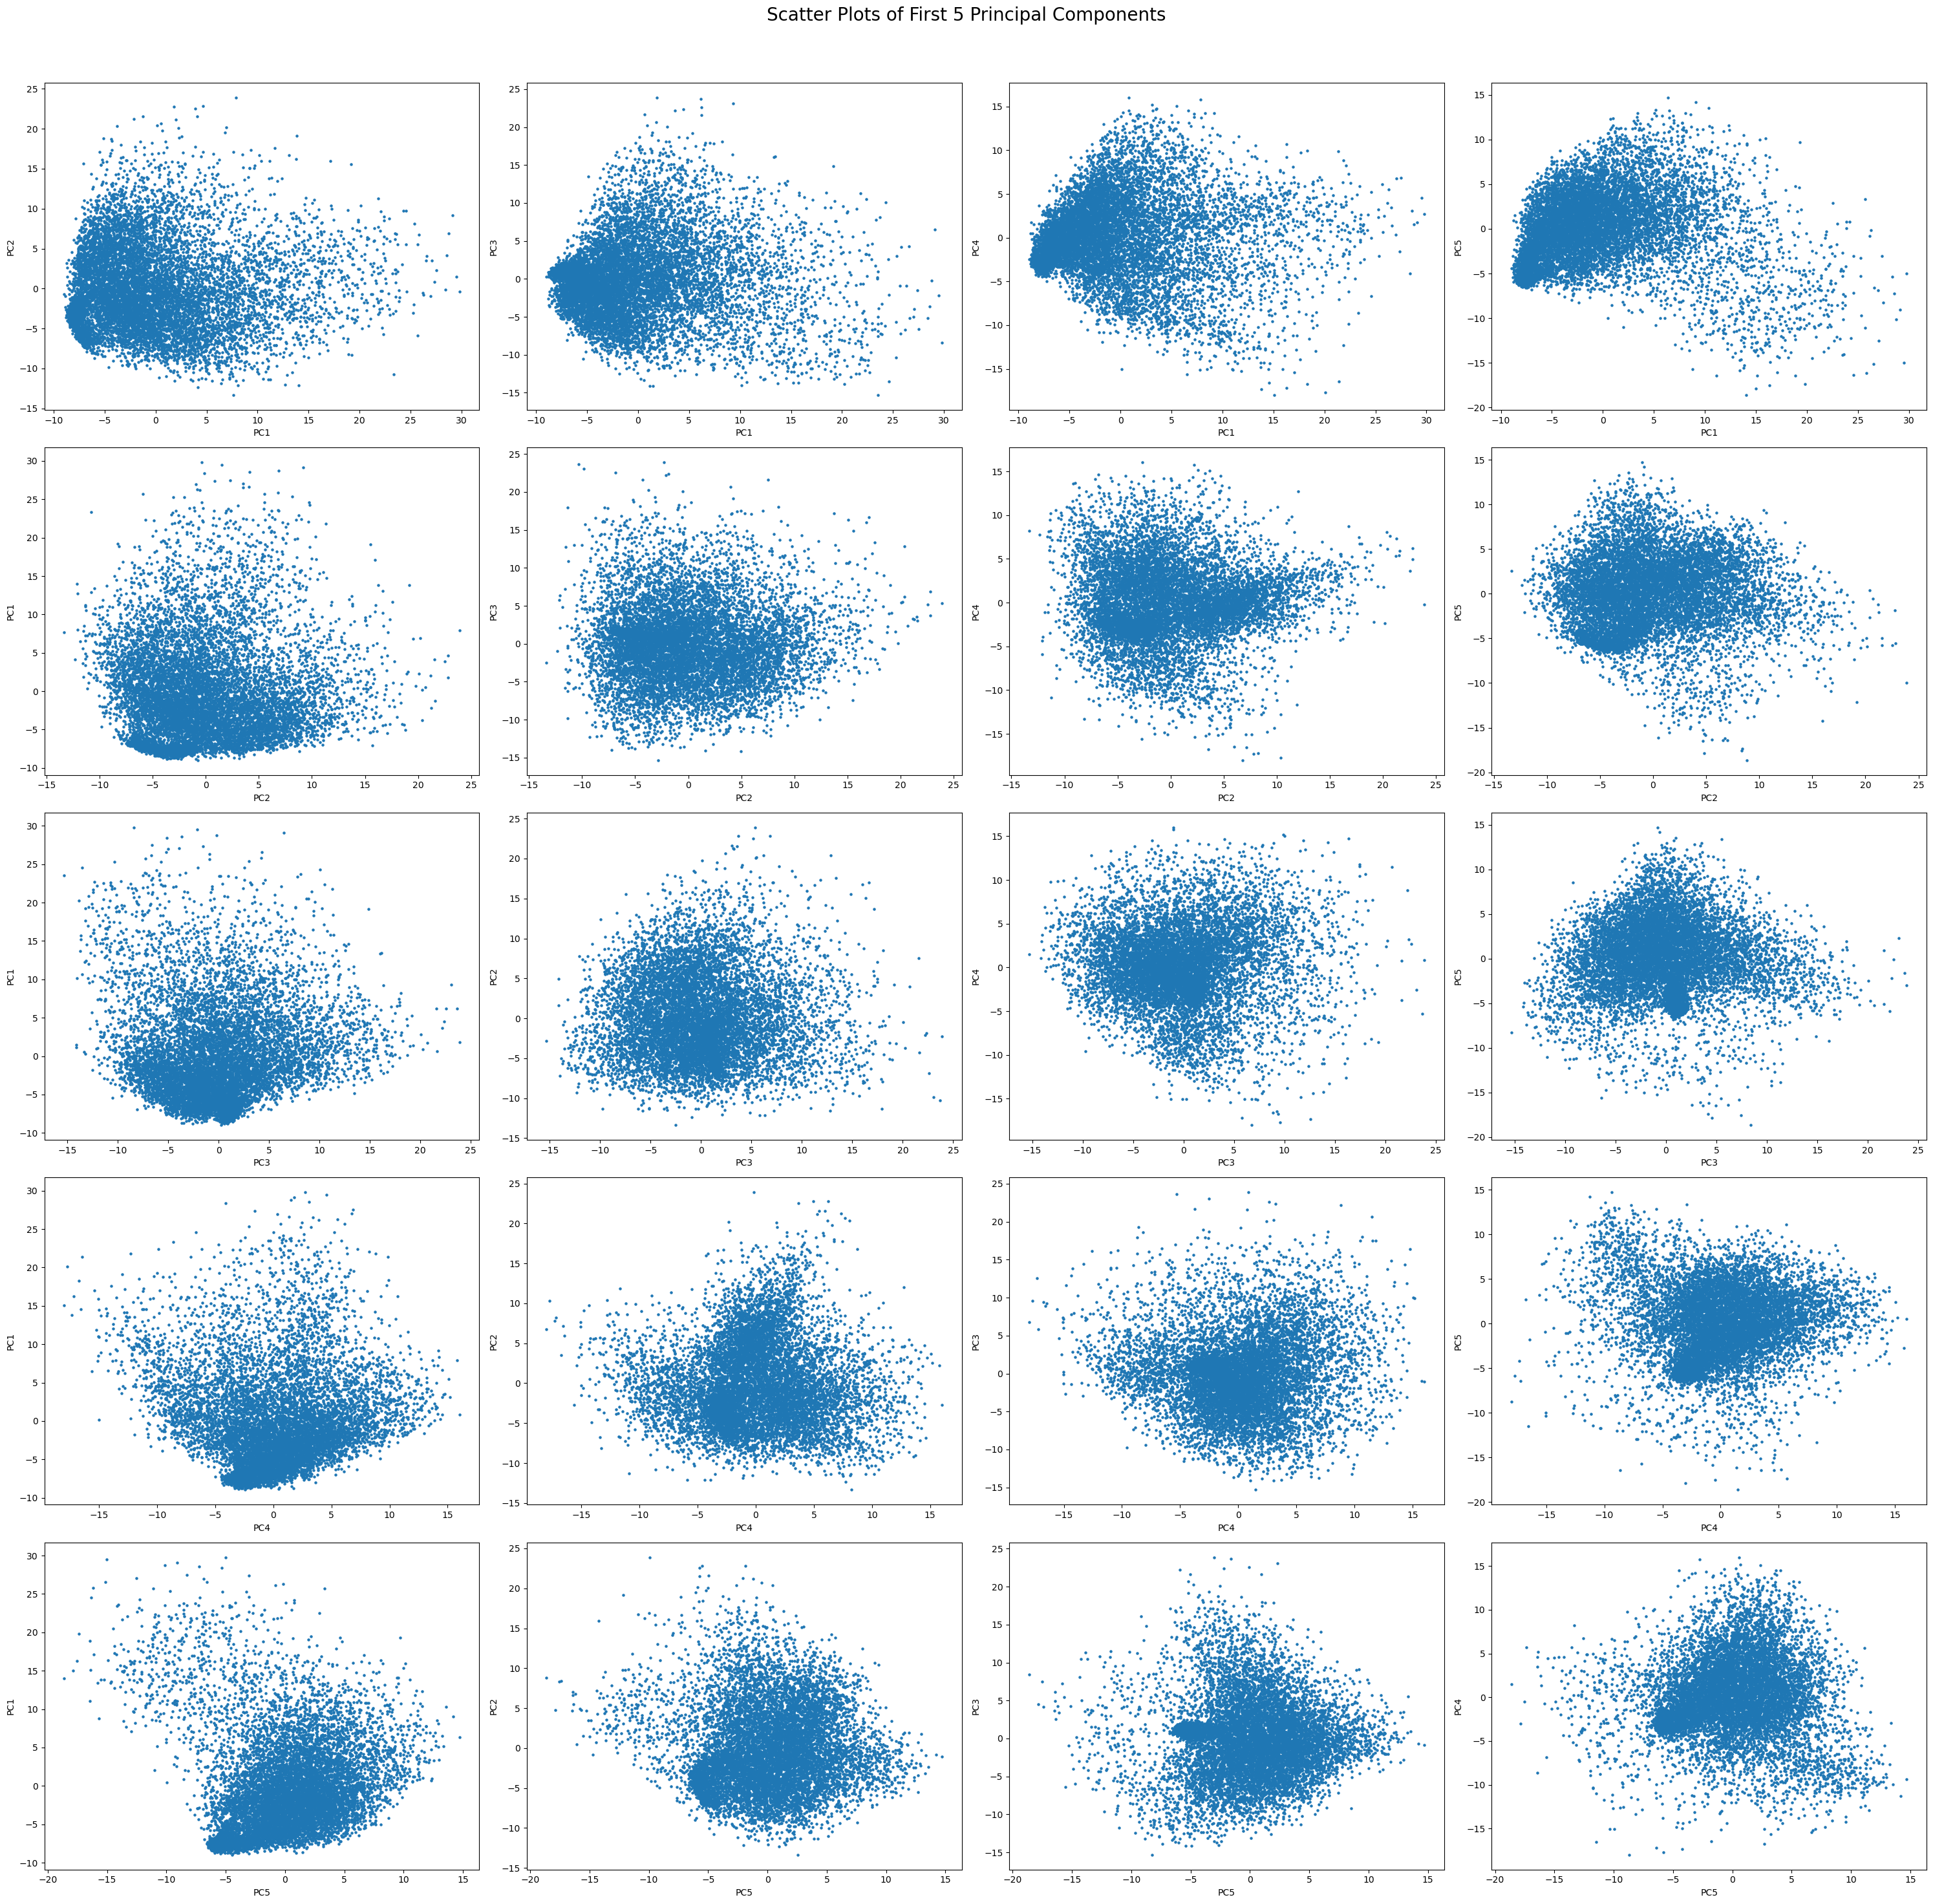

In [41]:
import matplotlib.pyplot as plt
pca_df = pd.DataFrame(data = df_pca, columns = [f'PC{i}' for i in range(1, pca.n_components_ + 1)])

fig, axes = plt.subplots(5, 4, figsize=(30, 30))
fig.suptitle('Scatter Plots of First 5 Principal Components', fontsize=20)

for i in range(5):
    other_pcs = list(range(5))
    other_pcs.remove(i)
    for j_idx, j in enumerate(other_pcs):
        ax = axes[i, j_idx]
        ax.scatter(pca_df[f'PC{i+1}'], pca_df[f'PC{j+1}'], s=5)
        ax.set_xlabel(f'PC{i+1}')
        ax.set_ylabel(f'PC{j+1}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### nothing conclusive in pc scatter plots.

## 6. t-SNE Visualization

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...
[t-SNE] Computed neighbors for 10000 samples in 1.483s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.953176
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.700363
[t-SNE] KL divergence after 1000 iterations: 1.674138
t-SNE done! Time elapsed

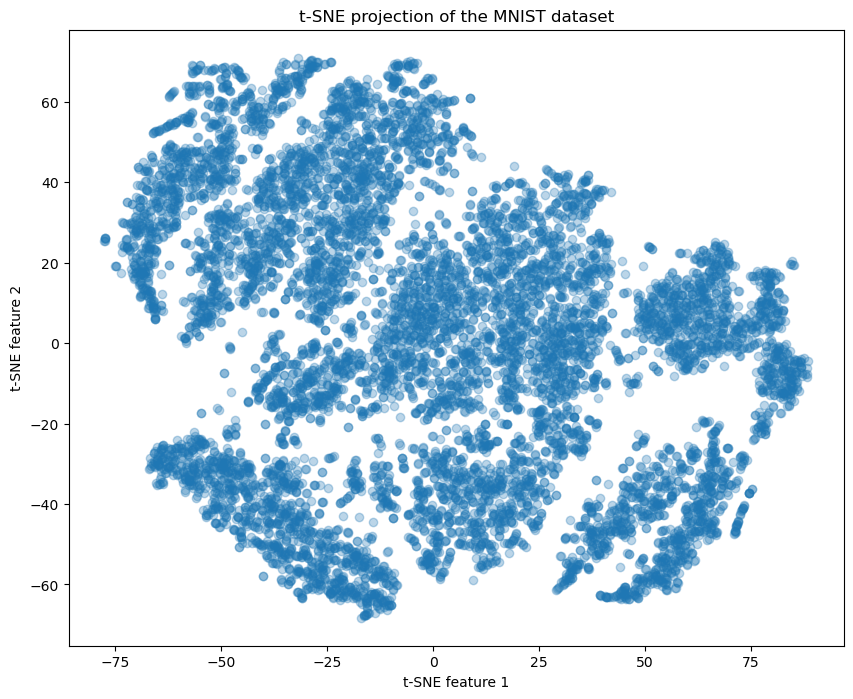

In [45]:
from sklearn.manifold import TSNE
import time

# Initialize t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=1000, learning_rate='auto', random_state=50)

# Fit and transform the scaled data
time_start = time.time()
tsne_results = tsne.fit_transform(X_Scaled)
print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne-2d-one', 'tsne-2d-two'])

tsne_df.to_csv("tsne-ouput.csv")

# Plot the t-SNE results
plt.figure(figsize=(10,8))
plt.scatter(tsne_df['tsne-2d-one'], tsne_df['tsne-2d-two'], alpha=0.3)

plt.title('t-SNE projection of the MNIST dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

### After applying t-SNE, we can see the two features of t-SNE are showing some boundaries of data which may be representing the images of similar drawing. While this is still not the perfect one, it is far better than PC output. 